# San Francisco Housing Cost Analysis
## by Sheldon Palm

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [225]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [226]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [118]:
import hvplot.pandas

## Load Data

In [119]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [242]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units = sfo_data["housing_units"]
housing_units = total_housing_units.groupby("year").mean()

housing_units.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [243]:
# Save the dataframe as a csv file

housing_units.to_csv('housing_units.csv', index= False)

In [245]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units.hvplot.bar(label="Housing Units Per Year", ylim=[370000, 385000])


:Bars   [year]   (housing_units)

In [246]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
#housing_units = housing_units.hvplot.bar(label=" Housing Units per Year", ylim=[370000, 385000])
#housing_units

In [247]:
total_housing_units_min = sfo_data["housing_units"]
housing_units_min = total_housing_units_min.groupby("year").min()

housing_units_min

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [125]:
# Calculate the average sale price per square foot and average gross rent
average_sales_price_sqt = sfo_data["sale_price_sqr_foot"]
average_sales_price_sqt = average_sales_price_sqt.groupby("year").mean()

average_gross_rent = sfo_data["gross_rent"]
average_gross_rent = average_gross_rent.groupby("year").mean()

average_sales_price_sqt.head()


year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
Name: sale_price_sqr_foot, dtype: float64

In [59]:
# Average gross rent
average_gross_rent.head()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
Name: gross_rent, dtype: int64

In [126]:
average_housing_cost = sfo_data[['sale_price_sqr_foot', 'gross_rent']]
average_housing_cost = average_housing_cost.groupby("year").mean()

average_housing_cost.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


In [127]:
average_sales_price_sqt.hvplot.line(label = "Average Sales Price per SQ Foot")


:Curve   [year]   (sale_price_sqr_foot)

In [128]:
average_gross_rent.hvplot.line(label = "Average Gross Rent", line_color = "red")

:Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [129]:
#file_path = Path("sfo_census_data.csv")
#sfo_neighborhood = pd.read_csv(file_path)
#avg_sfo_neighborhood = sfo_neighborhood.groupby("year").mean()
#avg_sfo_neighborhood.head()
file_path = Path("sfo_census_data.csv")
sfo_neighborhood = pd.read_csv(file_path)
sfo_neighborhood.head()



,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [130]:
sfo_neighborhood_prices = pd.DataFrame(sfo_data, columns=['neighborhood','sale_price_sqr_foot', 'gross_rent'])
sfo_neighborhood_prices= sfo_neighborhood_prices.groupby("year").mean()
sfo_neighborhood_prices.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [131]:
# Average Sale Price per Sqaure Foot
average_price_per_SQFT = sfo_data['sale_price_sqr_foot'].loc[lambda x: x >0]
average_price_per_SQFT = average_price_per_SQFT.groupby("year").mean()
average_price_per_SQFT

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [132]:
average_price_per_SQFT.hvplot(label = "Average price per SQFT")

:Curve   [year]   (sale_price_sqr_foot)

In [133]:
# Average Gross Rent 
average_gross_rent = sfo_data['gross_rent'].loc[lambda x: x >0]
average_gross_rent = average_gross_rent.groupby("year").max()
average_gross_rent

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [134]:
average_gross_rent.hvplot.line(label = "Average Gross Rent", line_color = "red")

:Curve   [year]   (gross_rent)

In [248]:
#average_prices_by_neighborhood.hvplot.line()
average_prices_by_neighborhood = sfo_data[["neighborhood", "gross_rent"]]
average_prices_by_neighborhood = average_prices_by_neighborhood.groupby("neighborhood").mean()

average_prices_by_neighborhood.head()

average_prices_by_neighborhood.hvplot.line(label = "Average Prices by Neighborhood",rot=45, width =1000)

:Curve   [neighborhood]   (gross_rent)

In [254]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_area_dropdown = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_area_dropdown.reset_index(inplace=True)
sfo_area_dropdown.rename(columns={"level_0": "year"}, inplace=True)

sfo_area_dropdown.hvplot(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Average Sale Price per Square Foot",
    groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [255]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

sfo_area_dropdown = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_area_dropdown.reset_index(inplace=True)
sfo_area_dropdown.rename(columns={"level_0": "year"}, inplace=True)

sfo_area_dropdown.hvplot(
    "year",
    "gross_rent",
    xlabel= "Year",
    ylabel="Average Gross Rent per Neighborhood",
    groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [135]:
# Getting the data from the top 10 expensive neighborhoods to own

top_ten_by_neighborhood = sfo_data[["neighborhood", "gross_rent"]]
top_ten_by_neighborhood = top_ten_by_neighborhood.groupby("neighborhood").mean().sort_values(by='gross_rent', ascending=False).iloc[:10]
top_ten_by_neighborhood.head()




,gross_rent
neighborhood,
Westwood Park,3959.0
Bayview Heights,3739.0
Visitacion Valley,3657.0
Silver Terrace,3528.0
Merced Heights,3414.0


In [136]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_by_neighborhood.hvplot.bar(label = "Top Ten Most Expensive Neighborhood", rot =45, width = 600)

:Bars   [neighborhood]   (gross_rent)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [137]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_neighborhood_prices = pd.DataFrame(sfo_data, columns=['sale_price_sqr_foot', 'gross_rent'])
sfo_neighborhood_prices= sfo_neighborhood_prices.groupby("year").mean()

sfo_neighborhood_prices.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [138]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_neighborhood_prices.hvplot.bar(staked=False, rot=45)

:Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [144]:
# Load neighborhoods coordinates data
# Read the Mapbox API key
load_dotenv('sample.env')
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)

# Read in data
sfo_map = pd.read_csv(Path("sfo_neighborhoods_coordinates.csv"))

sfo_map.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [145]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [146]:
# Calculate the mean values for each neighborhood
average_prices_by_neighborhood = sfo_data[["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"]]
average_prices_by_neighborhood = average_prices_by_neighborhood.groupby("neighborhood").mean()

average_prices_by_neighborhood.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [250]:
# Join the average values with the neighborhood locations
sfo_area = pd.read_csv("sfo_census_data.csv").drop_duplicates()
sfo_area.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [251]:
sfo_coordinates = pd.read_csv("sfo_neighborhoods_coordinates.csv").drop_duplicates()
sfo_coordinates.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [252]:
area_with_index = sfo_area.set_index("neighborhood")
coordinates_with_index = sfo_coordinates.set_index("Neighborhood")


In [168]:
area_with_index.drop(columns=['housing_units'], inplace=True)
area_with_index.head()

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,291.182945,1239
Anza Vista,267.932583,1239
Bayview,170.098665,1239
Buena Vista Park,347.394919,1239
Central Richmond,319.027623,1239


In [191]:
area_with_index= area_with_index.groupby("neighborhood").mean()
area_with_index.round(2)
area_with_index.head()

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,366.020712,2817.285714
Anza Vista,373.382198,3031.833333
Bayview,204.588623,2318.400000
Bayview Heights,590.792839,3739.000000
Bernal Heights,576.746488,3080.333333


In [170]:
area_with_index.head()

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,366.020712,2817.285714
Anza Vista,373.382198,3031.833333
Bayview,204.588623,2318.400000
Bayview Heights,590.792839,3739.000000
Bernal Heights,576.746488,3080.333333


In [171]:
sfo_sales_map = (
    pd.concat([area_with_index, coordinates_with_index], axis=1, sort=True)
    .dropna()
    .reset_index()
)
sfo_sales_map.head()

,index,sale_price_sqr_foot,gross_rent,Lat,Lon
0,Alamo Square,366.020712,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,2698.833333,37.768160,-122.439330


In [194]:
sfo_sales_map.round(2)


,index,sale_price_sqr_foot,gross_rent,Lat,Lon
0,Alamo Square,366.02,2817.29,37.79,-122.40
1,Anza Vista,373.38,3031.83,37.78,-122.44
2,Bayview,204.59,2318.40,37.73,-122.40
3,Bayview Heights,590.79,3739.00,37.73,-122.41
4,Buena Vista Park,452.68,2698.83,37.77,-122.44
5,Central Richmond,394.42,2817.29,37.78,-122.45
6,Central Sunset,423.69,2817.29,37.75,-122.49
7,Clarendon Heights,487.24,2250.50,37.75,-122.45
8,Corona Heights,587.54,2472.00,37.79,-122.46
9,Cow Hollow,665.96,2817.29,37.79,-122.44


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [145]:
# Set the mapbox access token
# Read the Mapbox API key
load_dotenv('sample.env')
map_box_api = os.getenv("mapbox")

# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)


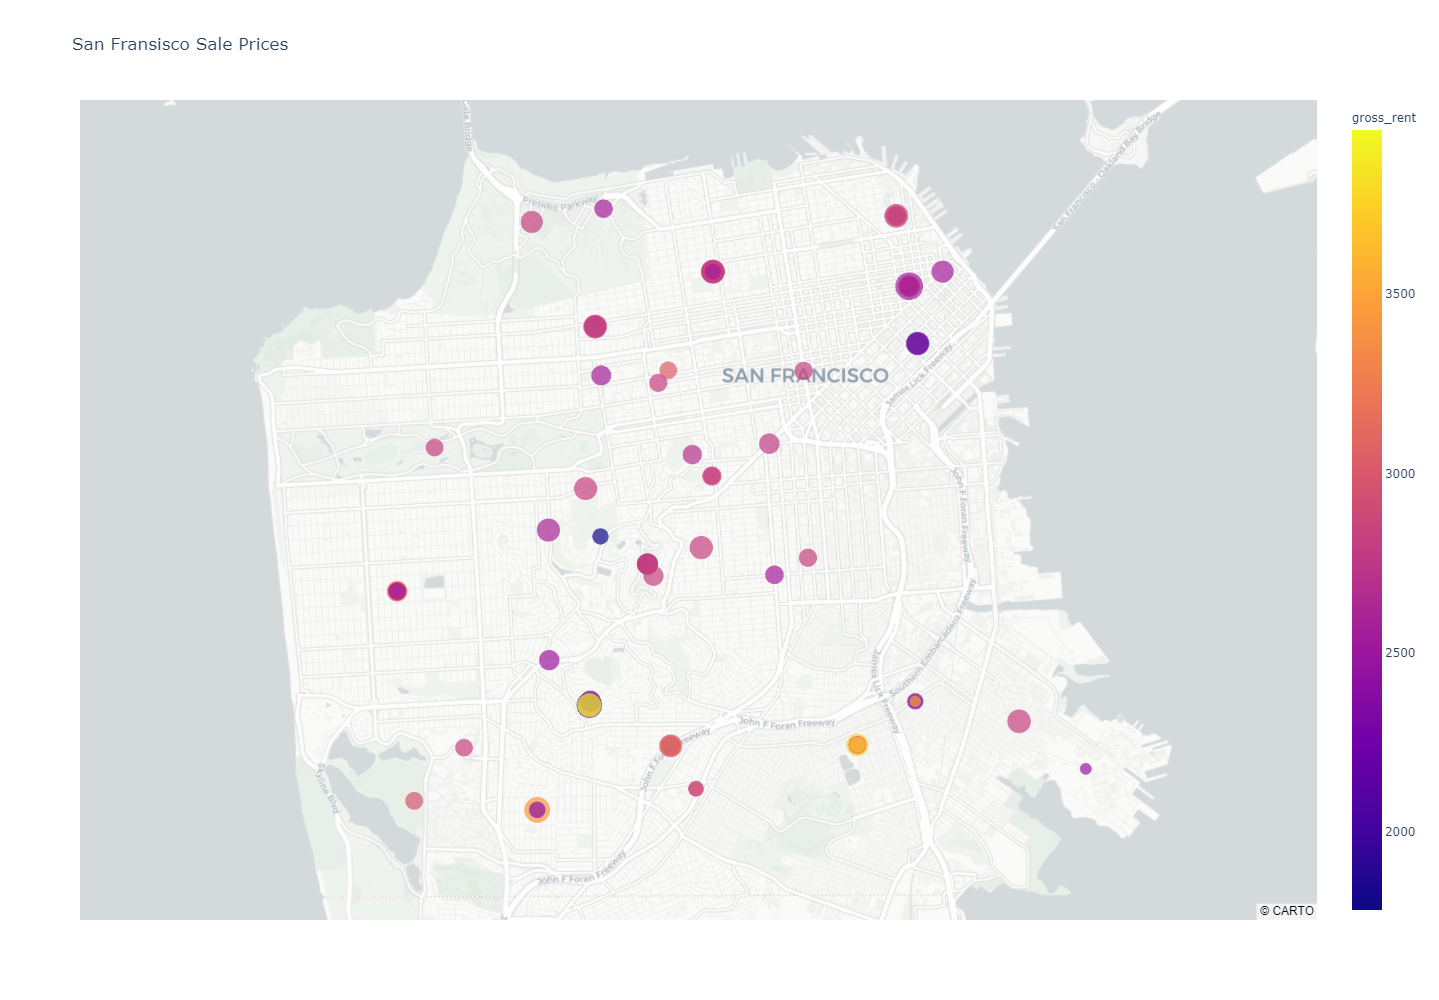

In [224]:
# Create plots
map_1 = px.scatter_mapbox(
    sfo_sales_map,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    text=None,
    hover_name="index",
    hover_data=None,
    custom_data=None,
    size="sale_price_sqr_foot",
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels="gross_rent",
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    size_max=None,
    zoom=12,
    center=None,
    mapbox_style="carto-positron",
    title="San Fransisco Sale Prices",
    template=None,
    width=1000,
    height=1000,
    
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [214]:
# Fetch the data from all expensive neighborhoods per year.
expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False)
expensive_neighborhoods = expensive_neighborhoods.reset_index()
expensive_neighborhoods = expensive_neighborhoods.head(10)
expensive_neighborhoods.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


In [215]:
expensive_neighborhoods_year = sfo_data[sfo_data["neighborhood"].isin(expensive_neighborhoods["neighborhood"])]
expensive_neighborhoods_year = expensive_neighborhoods_year.reset_index()
expensive_neighborhoods_year = expensive_neighborhoods_year
expensive_neighborhoods_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Cow Hollow,569.379968,372560,1239
1,2010,Miraloma Park,680.608729,372560,1239
2,2010,Pacific Heights,496.516014,372560,1239
3,2010,Potrero Hill,491.450004,372560,1239
4,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


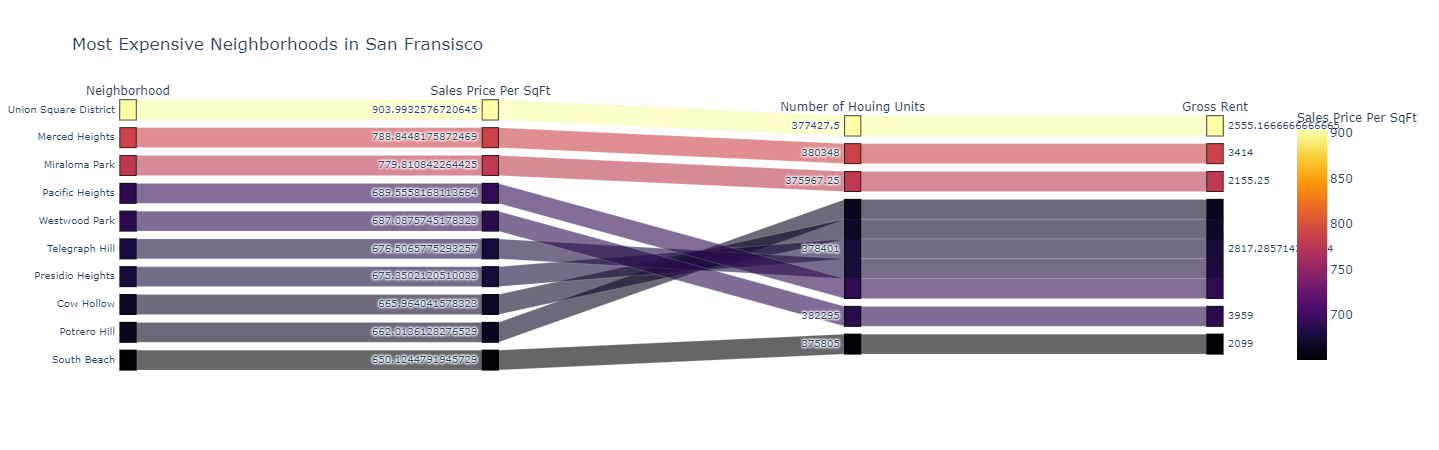

In [220]:
# Parallel Categories Plot
parallel_categories_plot = px.parallel_categories(
    expensive_neighborhoods,
    dimensions = ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
    title='Most Expensive Neighborhoods in San Fransisco',
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sales Price Per SqFt",
        "housing_units": "Number of Houing Units",
        "gross_rent": "Gross Rent"})

parallel_categories_plot

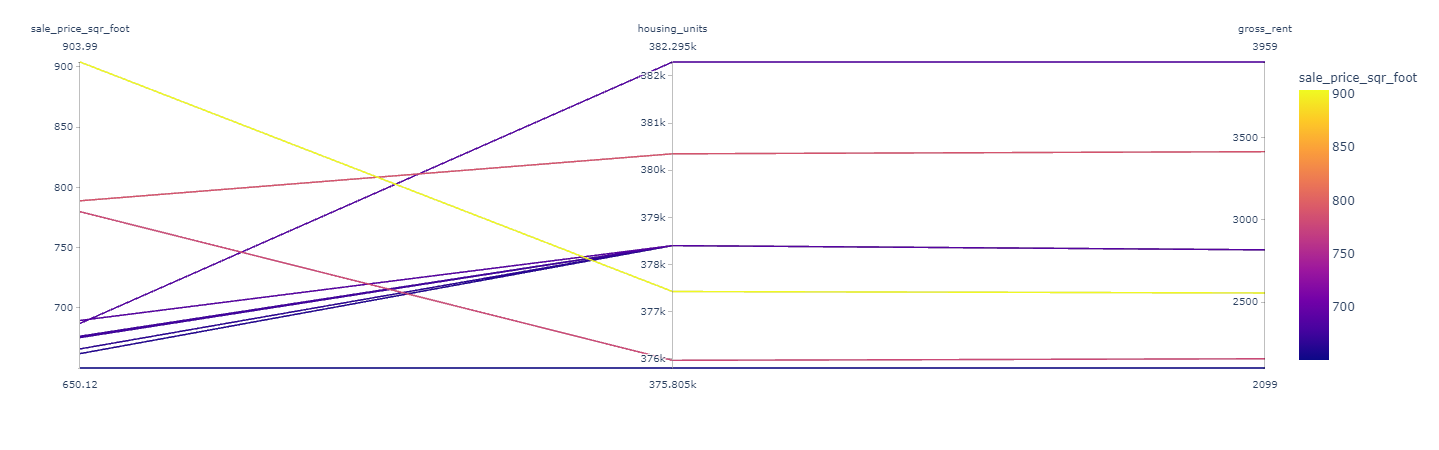

In [221]:
# Parallel Coordinates Plot
parallel_coordinates_plot = px.parallel_coordinates(expensive_neighborhoods, color='sale_price_sqr_foot')
parallel_coordinates_plot

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

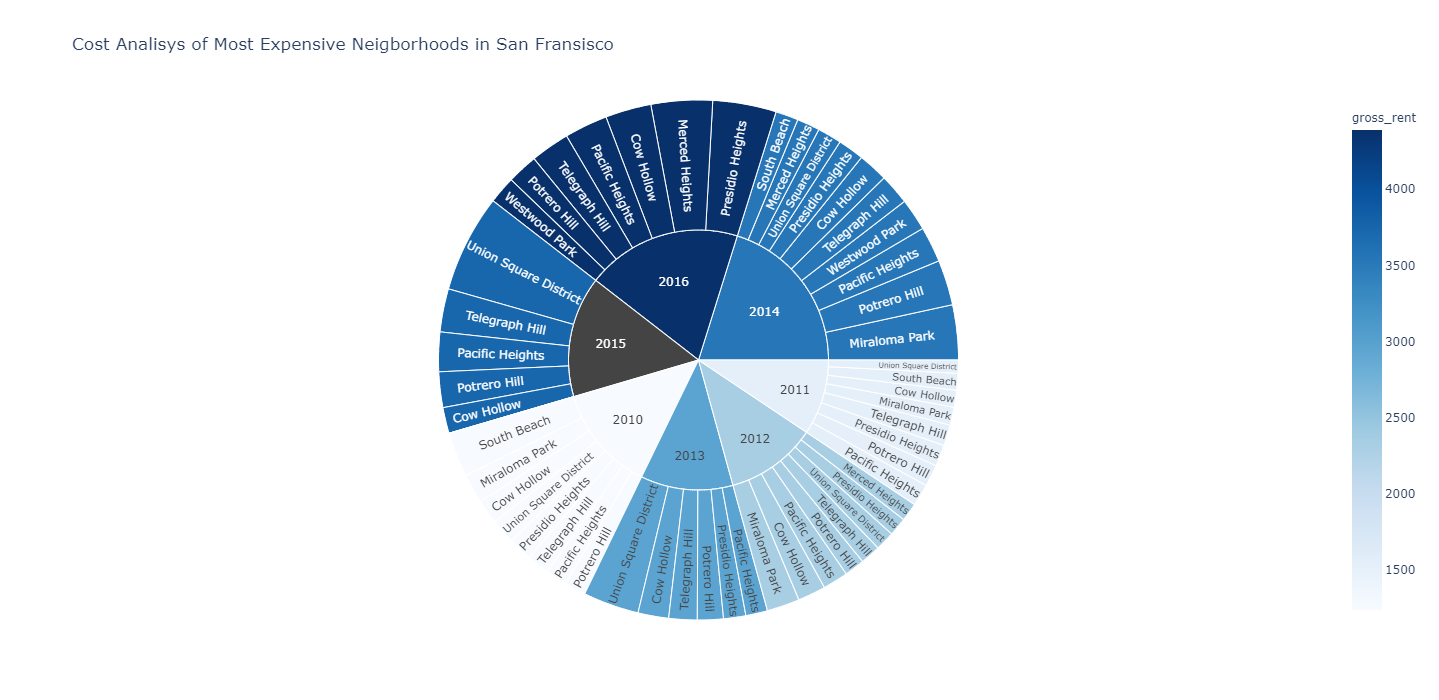

In [223]:
# Sunburst Plot
# YOUR CODE HERE!sunburst_plot = px.sunburst(
sunburst_plot = px.sunburst(
    expensive_neighborhoods_year,
    path=['year', 'neighborhood'],
    title='Cost Analisys of Most Expensive Neigborhoods in San Fransisco',
    values='sale_price_sqr_foot',
    color='gross_rent',
    hover_data=['neighborhood'],
    height=700,
    width=700,
    color_continuous_scale='blues',
    color_continuous_midpoint=np.average(expensive_neighborhoods_year['gross_rent'],
    weights=expensive_neighborhoods_year['sale_price_sqr_foot']))

sunburst_plot